In [1]:
# Assignment 2
# Statistics

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import pingouin as pg

#change virtual env directory due to re-organization
import os
os.chdir('stats-project')

/Users/mirandalu/miniconda3/envs/che155/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


/Users/mirandalu/miniconda3/envs/che155/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')


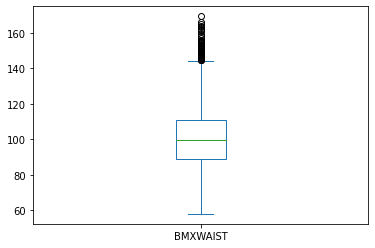

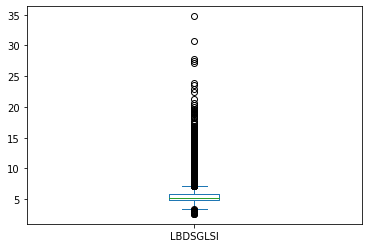

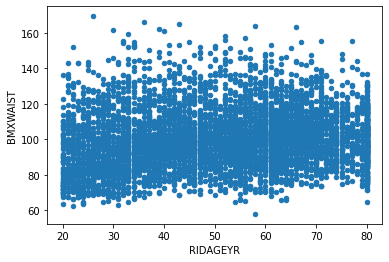

In [2]:
#hypothesis testing: relationship between blood glucose level and waist circumference and education level
#H0: blood glucose level remains constant
#Ha: blood glucose level increases with education level and wasit circumference

bio = pd.read_sas('BIOPRO_J.XPT',index='SEQN')
demo = pd.read_sas('DEMO_J.XPT',index='SEQN')
bmx = pd.read_sas('BMX_J.XPT',index='SEQN')
bp = pd.read_sas('BPX_J.XPT',index='SEQN')

df = bio.merge(demo,how='outer',on='SEQN')
df = df.merge(bmx,how='outer',on='SEQN')
df = df.merge(bp,how='outer',on='SEQN')

adults = df[df.RIDAGEYR.ge(20) & df.RIDAGEYR.le(65)].copy()
df=df.query('DMDEDUC2 < 6').copy()

df.plot.box(x= 'DMDEDUC2',y='BMXWAIST')
df.plot.box(x= 'DMDEDUC2',y='LBDSGLSI')
df.plot.scatter(x='RIDAGEYR', y = 'BMXWAIST')

edu = df['DMDEDUC2'].astype('category')
print(edu.cat.categories)
edu = df['DMDEDUC2'].astype('category')

/Users/mirandalu/miniconda3/envs/che155/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


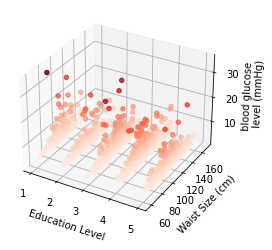

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['DMDEDUC2'],df['BMXWAIST'],df['LBDSGLSI'],cmap='Reds', c= df['LBDSGLSI'])

ax.set_xlabel('Education Level')
ax.set_ylabel('Waist Size (cm)')
ax.set_zlabel('blood glucose \n level (mmHg)',rotation = 75)
fig.show()

In [4]:
#categorize the education level
df = df[['LBDSGLSI','BMXWAIST','DMDEDUC2']]
print(edu.cat.categories)
edu = edu.cat.rename_categories(['some HS',
                                 'HS no diploma',
                                 'HS',
                                 'some college',
                                 'college or above'])

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64')


In [5]:
index = df[(df['DMDEDUC2'] == 'refused') | (df['DMDEDUC2'] == 'don\'t know')].index 
df = df.drop(index)

In [6]:
df = df.dropna()
x = df[['BMXWAIST','DMDEDUC2']]
y = df['LBDSGLSI']

In [7]:
#making a multiple linear regression model with the new data set
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
graph = regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 3.832143089323467
Coefficients: 
 [ 0.02366667 -0.14364209]


In [8]:
#perform covariance analysis to exaimine the p-sore

pg.ancova(data = df, 
          dv = 'LBDSGLSI', 
          covar = 'DMDEDUC2', 
          between = 'BMXWAIST')

#Conclusion 
#significant relationship between blood glucose level and wasite size
#significant relationship blood glucose level and eduation level 

,Source,SS,DF,F,p-unc,np2
0,BMXWAIST,4089.145207,784,1.293283,8.513259e-07,0.207904
1,DMDEDUC2,95.345050,1,23.641515,1.206754e-06,0.006083
2,Residual,15579.286467,3863,NaN,NaN,NaN
